In [20]:
import pandas as pd
import numpy as np
import seaborn as sns


In [21]:
channel_df = pd.read_csv(r'C:\Users\Haesung Lee\Desktop\VS_Code\youtube\youtube_channel_June_week03.csv')

In [55]:
channel_data = pd.DataFrame(channel_df).copy()
channel_data = channel_data.sort_values(by='channel_name', ascending = False)
channel_data = channel_data

In [95]:
June02 = channel_data.loc[channel_data.retrieved_date == '2022-06-02'].reset_index()
June23 = channel_data.loc[channel_data.retrieved_date == '2022-06-23'].reset_index()
# June23['subgain'] = June23['subscribers'] - June02['subscribers']
# June23['viewgain'] = June23['views'] - June02['views']
# June23['videoupload'] = June23['total_videos'] - June02['total_videos']


In [94]:
June02

,index,channel_name,published_date,subscribers,views,total_videos,playlist_id,retrieved_date
0,77,yo_boy_Roy,2016-02-28,612000,85128307,447,UULyDtiTLFZ-Ns6gZQDcPv6g,2022-06-02
1,2,xBCrafted,2007-11-05,381000,87438301,4684,UU_MkjhQr_D_lGlO3uu-GxyA,2022-06-02
2,160,tiffanyferg,2011-03-18,759000,56380302,232,UUY6DpwQetygtye7GM1zVHmw,2022-06-02
3,67,the DM Lair,2011-10-18,106000,13529130,400,UUk9dtbM-wjpLk134r55OUbg,2022-06-02
4,212,space googlevesaire,2017-07-05,393000,37381000,1013,UU6Iv92nZE21XWt0B1ZTCd6Q,2022-06-02
...,...,...,...,...,...,...,...,...
295,156,African Vulture,2013-08-07,106000,11988459,994,UUVaAjxoHN32qDCZLBKA5rIA,2022-06-02
296,135,Adventure Time,2016-11-03,827000,682081304,839,UUFuU-5B1eKAWaTeLUu3JuyA,2022-06-02
297,250,AccuWeather,2006-12-03,263000,68471411,1325,UUuYqi3hOfz6-3Hdp6tEJjAg,2022-06-02
298,137,AML FILMS,2010-03-30,139000,33239819,652,UUyWpRDBBb84ogtALVskwciw,2022-06-02


In [98]:
June23

,index,channel_name,published_date,subscribers,views,total_videos,playlist_id,retrieved_date
0,6368,yo_boy_Roy,2016-02-28,612000,85713987,454,UULyDtiTLFZ-Ns6gZQDcPv6g,2022-06-23
1,6337,xBCrafted,2007-11-05,382000,87772335,4689,UU_MkjhQr_D_lGlO3uu-GxyA,2022-06-23
2,6450,tiffanyferg,2011-03-18,760000,56586346,233,UUY6DpwQetygtye7GM1zVHmw,2022-06-23
3,6354,the DM Lair,2011-10-18,108000,13827660,409,UUk9dtbM-wjpLk134r55OUbg,2022-06-23
4,6508,space googlevesaire,2017-07-05,392000,36317202,752,UU6Iv92nZE21XWt0B1ZTCd6Q,2022-06-23
...,...,...,...,...,...,...,...,...
295,6473,African Vulture,2013-08-07,106000,12184461,1009,UUVaAjxoHN32qDCZLBKA5rIA,2022-06-23
296,6408,Adventure Time,2016-11-03,836000,693123748,850,UUFuU-5B1eKAWaTeLUu3JuyA,2022-06-23
297,6565,AccuWeather,2006-12-03,263000,68706035,1338,UUuYqi3hOfz6-3Hdp6tEJjAg,2022-06-23
298,6417,AML FILMS,2010-03-30,141000,33739378,672,UUyWpRDBBb84ogtALVskwciw,2022-06-23


In [117]:
YT_Analysis = June23[['channel_name', 'playlist_id']].copy()
YT_Analysis['subgain'] = June23.subscribers - June02.subscribers
YT_Analysis['viewgain'] = June23.views - June02.views
YT_Analysis['uploads'] = June23.total_videos - June02.total_videos
YT_Analysis['subperupload'] = (YT_Analysis['subgain'] / YT_Analysis['uploads']).round(1)
YT_Analysis['viewperupload'] = (YT_Analysis['viewgain'] / YT_Analysis['uploads']).round(1)
YT_Analysis

,channel_name,playlist_id,subgain,viewgain,uploads,subperupload,viewperupload
0,yo_boy_Roy,UULyDtiTLFZ-Ns6gZQDcPv6g,0,585680,7,0.0,83668.6
1,xBCrafted,UU_MkjhQr_D_lGlO3uu-GxyA,1000,334034,5,200.0,66806.8
2,tiffanyferg,UUY6DpwQetygtye7GM1zVHmw,1000,206044,1,1000.0,206044.0
3,the DM Lair,UUk9dtbM-wjpLk134r55OUbg,2000,298530,9,222.2,33170.0
4,space googlevesaire,UU6Iv92nZE21XWt0B1ZTCd6Q,-1000,-1063798,-261,3.8,4075.9
...,...,...,...,...,...,...,...
295,African Vulture,UUVaAjxoHN32qDCZLBKA5rIA,0,196002,15,0.0,13066.8
296,Adventure Time,UUFuU-5B1eKAWaTeLUu3JuyA,9000,11042444,11,818.2,1003858.5
297,AccuWeather,UUuYqi3hOfz6-3Hdp6tEJjAg,0,234624,13,0.0,18048.0
298,AML FILMS,UUyWpRDBBb84ogtALVskwciw,2000,499559,20,100.0,24978.0


In [118]:

top30_subgain = YT_Analysis.sort_values(by='subgain', ascending=False).head(40)
top30_viewgain = YT_Analysis.sort_values(by='viewgain', ascending=False).head(40)

top30_subgain



,channel_name,playlist_id,subgain,viewgain,uploads,subperupload,viewperupload
118,Piinkblinks,UUP4YXxcqD8Ca5tBPjQz0Vfg,134000,7799435,26,5153.8,299978.3
38,Tyrecordslol,UU-A2WBfHTnWkhNvehNo-MaA,82000,26759318,29,2827.6,922735.1
110,Quanta Magazine,UUTpmmkp1E4nmZqWPS-dl5bg,32000,1617520,0,inf,inf
234,DreamyBear - Monster School Minecraft Animation,UUEIAItDIwg-6H1knECqwEMg,16000,5101503,6,2666.7,850250.5
241,Dexter Playz,UUKvnz_vFpGajDcaKOZbZPLA,15000,2517491,21,714.3,119880.5
247,Dark Tech,UU7PYOpaIhJG1tlcn8jGgsgw,15000,2633461,10,1500.0,263346.1
218,Fizzory,UU4TLfCoiFGP3TGesLorGJRQ,13000,23551092,218,59.6,108032.5
31,Waseem,UUoqmwxgYpTJdhKc-XaQMutw,12000,2768853,3,4000.0,922951.0
255,Color World,UUKWbQrioahooOUea4zJQtnQ,12000,312447,0,inf,inf
256,Coin - Minecraft Animation,UU3aXZfttX0TZKBVEPJAeCKA,11000,-373542,3,3666.7,-124514.0


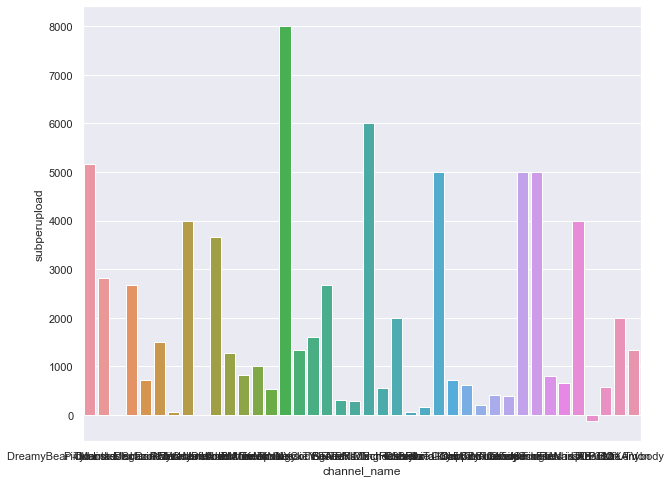

In [119]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot ( x= 'channel_name', y='subperupload', data = top30_subgain)

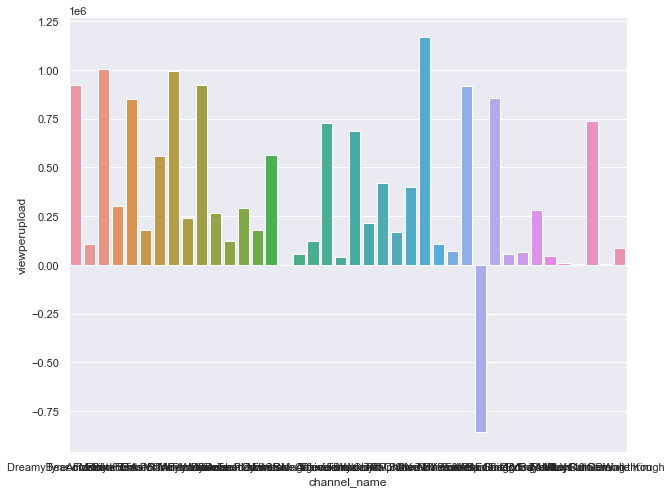

In [120]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot ( x= 'channel_name', y='viewperupload', data = top30_viewgain)

In [109]:
top30_viewgain = YT_Analysis.sort_values(by='viewgain', ascending=False).head(30)
top30_viewgain

,channel_name,playlist_id,subgain,viewgain,uploads,subperupload,viewperupload
38,Tyrecordslol,UU-A2WBfHTnWkhNvehNo-MaA,82000,26759318,29,2827.6,922735.1
218,Fizzory,UU4TLfCoiFGP3TGesLorGJRQ,13000,23551092,218,59.6,108032.5
296,Adventure Time,UUFuU-5B1eKAWaTeLUu3JuyA,9000,11042444,11,818.2,1003858.5
118,Piinkblinks,UUP4YXxcqD8Ca5tBPjQz0Vfg,134000,7799435,26,5153.8,299978.3
234,DreamyBear - Monster School Minecraft Animation,UUEIAItDIwg-6H1knECqwEMg,16000,5101503,6,2666.7,850250.5
229,ETA PRIME,UU_0CVCfC_3iuHqmyClu59Uw,7000,4083472,23,304.3,177542.3
99,RoboFuse - Car City Universe,UU9MRdB1ruN8GMnf6YbvrZ-Q,5000,3893908,7,714.3,556272.6
143,Mr. Anybody,UUPAqHLrEXrRKAWPi7n6OTJQ,4000,2979886,3,1333.3,993295.3
42,TimProVision,UUs1HcDiXFdZ24hWdTczj6Wg,5000,2909407,12,416.7,242450.6
31,Waseem,UUoqmwxgYpTJdhKc-XaQMutw,12000,2768853,3,4000.0,922951.0


In [85]:
df = pd.DataFrame({'channel': ['a', 'b', 'c', 'd', 'e','a', 'b', 'c', 'd', 'e'],
                   'subs': [100, 200, 300, 400, 500, 110, 220, 330, 440, 550],
                   'views': [600, 700, 800, 900, 1000, 670, 750, 840, 930, 1250],
                   'date' : ['2022-06-02', '2022-06-02', '2022-06-02', '2022-06-02', '2022-06-02','2022-06-16', '2022-06-16', '2022-06-16', '2022-06-16', '2022-06-16'],
                
})

In [88]:
day01 = df.loc[df.date == '2022-06-02']
day14 = df.loc[df.date == '2022-06-16']

YT_Analysis = day14[['channel']].copy()
YT_Analysis['subgain'] = day01.subs - day14.subs
YT_Analysis['viewgain'] = day01.views - day14.views
YT_Analysis

,channel,subgain,viewgain
5,a,NaN,NaN
6,b,NaN,NaN
7,c,NaN,NaN
8,d,NaN,NaN
9,e,NaN,NaN
